In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
# Importing the dataset
dataset =pd.read_csv('./spam_ham_dataset.csv')

In [3]:
dataset.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
dataset.drop('Unnamed: 0', axis=1, inplace = True)


In [5]:
#Let's change the names of the columns according to their significance
dataset.columns = ['label', 'email', 'class']

In [6]:
dataset.head()

,label,email,class
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [7]:
# No NaN in the dataset
dataset.isna().sum()

label    0
email    0
class    0
dtype: int64

In [8]:
dataset.shape

(5171, 3)

In [18]:
# For Text processing 
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\surafel.s\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [19]:
# Cleaning the texts

stop_words = set(stopwords.words('english')) 

dataset['email'] = dataset['email'].apply(lambda x: ' '.join([ word for word in word_tokenize(x)  if not word in stop_words]))

In [20]:
X = dataset.loc[:, 'email']
y =dataset.loc[:, 'class'].values

In [21]:
X[1]

'Subject : hpl nom january 9 , 2001 ( see attached file : hplnol 09 . xls ) - hplnol 09 . xls'

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(X).toarray()


In [23]:
X[1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [25]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm1 = confusion_matrix(y_test, y_pred)

In [28]:
print('Accuracy: ', accuracy_score(y_test, y_pred) * 100)


Accuracy:  95.8118556701031


<AxesSubplot:>

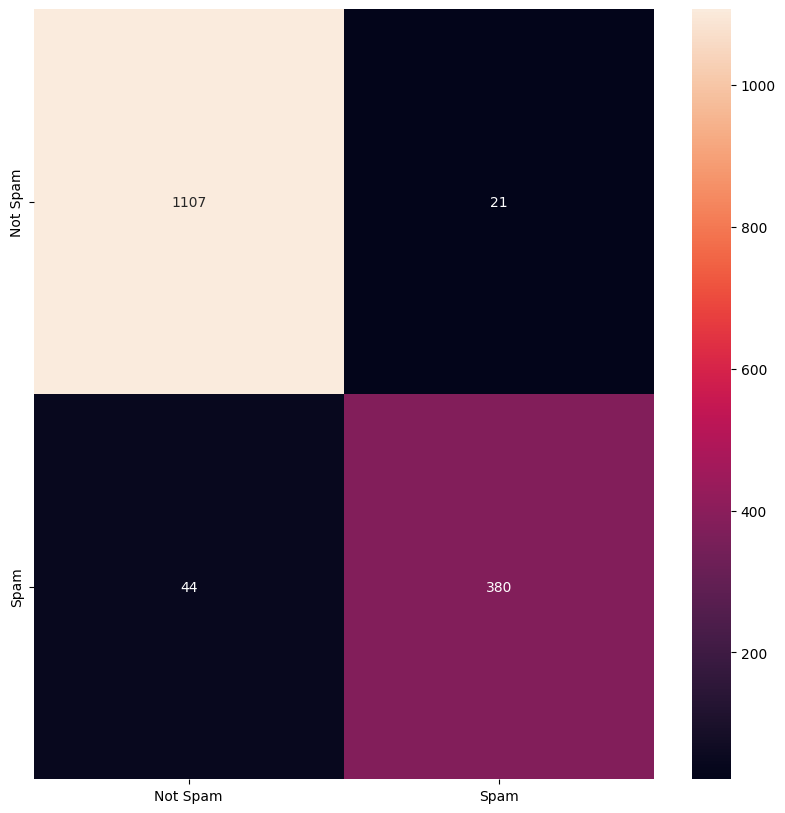

In [29]:
import seaborn as sns
plt.figure(figsize = (10, 10))
sns.heatmap(cm1,annot = True, fmt="n", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])

In [30]:
from sklearn.ensemble import RandomForestClassifier
cl=RandomForestClassifier()
cl.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
# Predicting the Test set results
y_pred = cl.predict(X_test)

In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm2 = confusion_matrix(y_test, y_pred)
print('Accuracy: ', accuracy_score(y_test, y_pred) * 100)

Accuracy:  97.16494845360825
